<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg"]
urls = ["https://backlightblog.com/images/2021/09/low-contrast-photography-1.jpg"]

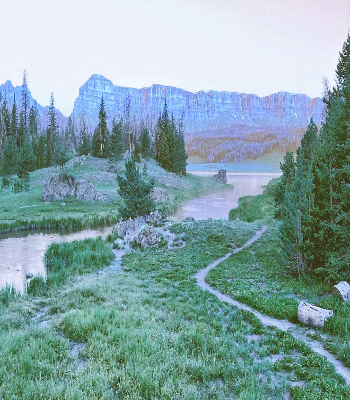

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  resized = cv2.resize(image, (350, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

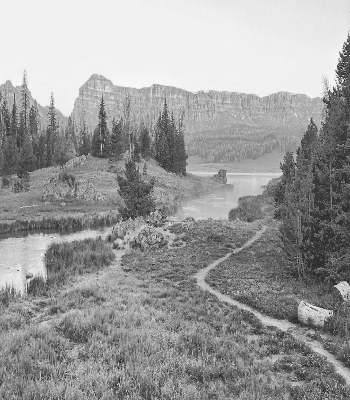

In [ ]:
gray_image = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

### Image Enhancement by adding a constant value ‘90’ to first half of the image

In [ ]:
half_image = np.zeros((400,350))
for i in range(len(half_image)//2):
  for j in range(len(half_image[0])):
    half_image[i][j] = 90
print(half_image)
print(gray_image.shape)
half_image = half_image.astype('uint8')

[[90. 90. 90. ... 90. 90. 90.]
 [90. 90. 90. ... 90. 90. 90.]
 [90. 90. 90. ... 90. 90. 90.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
(400, 350)


Shape Shape Before: (400, 350)
Shape After: (400, 350)
Before Addition: 
Memory: 140120


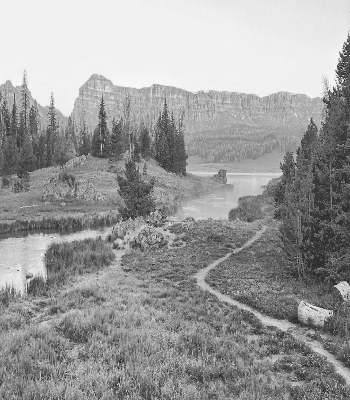

After Addition: 
Memory: 140120


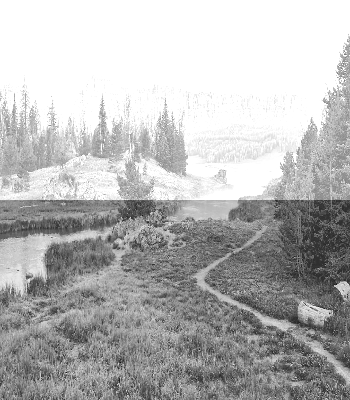

In [ ]:
addition = cv2.add(gray_image, half_image)
print("Shape Shape Before:", gray_image.shape)
print("Shape After:", addition.shape)
print("Before Addition: ")
print("Memory:", sys.getsizeof(gray_image))
cv2_imshow(gray_image)
print("After Addition: ")
print("Memory:", sys.getsizeof(addition))
cv2_imshow(addition)

### Image Enhancement by subtracting a constant value ‘90’ to first half of the image

Shape Shape Before: (400, 350)
Shape After: (400, 350)
Before Subtraction: 
Memory: 140120


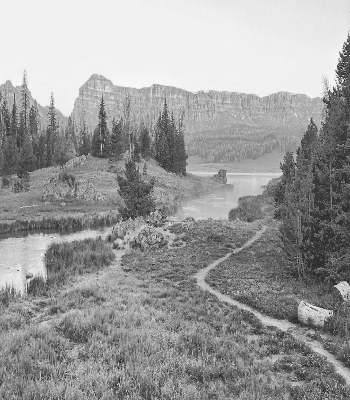

After Subtraction: 
Memory: 140120


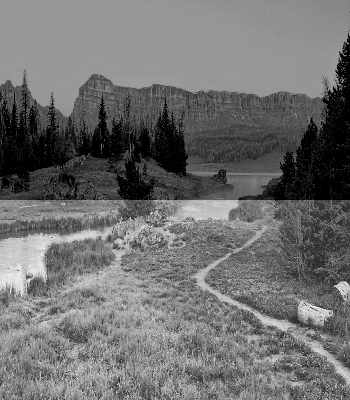

In [ ]:
subtraction = cv2.subtract(gray_image, half_image)
print("Shape Shape Before:", gray_image.shape)
print("Shape After:", subtraction.shape)
print("Before Subtraction: ")
print("Memory:", sys.getsizeof(gray_image))
cv2_imshow(gray_image)
print("After Subtraction: ")
print("Memory:", sys.getsizeof(subtraction))
cv2_imshow(subtraction)

### Image Enhancement like gamma transformation on the entire image

Shape Shape Before: (400, 350)
Before Gamma Transformation: 
Memory: 140120


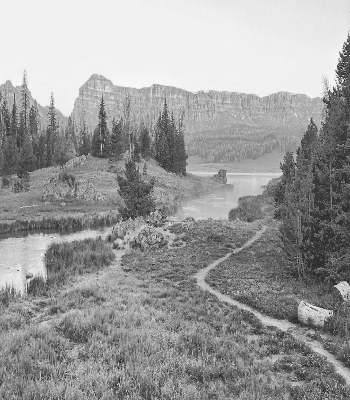

Shape After: (400, 350)
After Gamma Transformation: 
Memory: 1120120


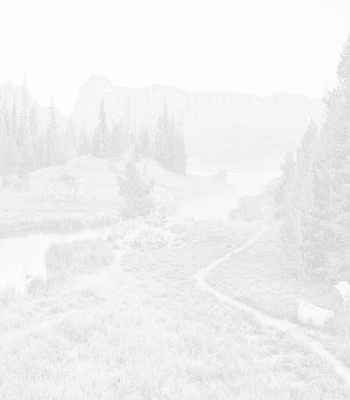

Shape After: (400, 350)
After Gamma Transformation: 
Memory: 1120120


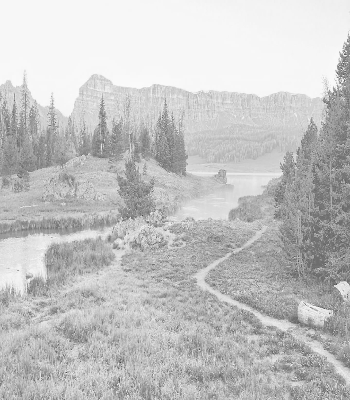

Shape After: (400, 350)
After Gamma Transformation: 
Memory: 1120120


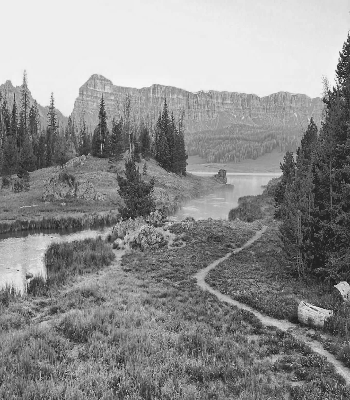

Shape After: (400, 350)
After Gamma Transformation: 
Memory: 1120120


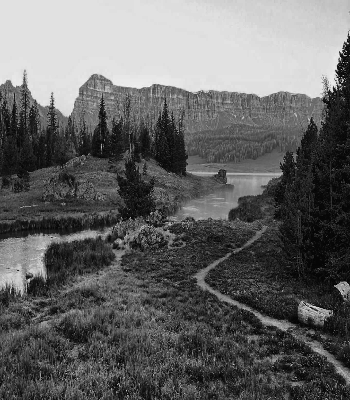

Increase in memory size is due to change in types from uint8 to float64.
Datatype of original image:  <class 'numpy.uint8'>
Datatype of gamma-corrected image:  <class 'numpy.float64'>


In [ ]:
print("Shape Shape Before:", gray_image.shape)
print("Before Gamma Transformation: ")
print("Memory:", sys.getsizeof(gray_image))
cv2_imshow(gray_image)

for gamma in [0.1, 0.5, 1.2, 2.2]:
    gamma_corrected = np.array(255*(gray_image / 255) ** gamma)
    print("Shape After:", gamma_corrected.shape)
    print("After Gamma Transformation: ")
    print("Memory:", sys.getsizeof(gamma_corrected))
    cv2_imshow(gamma_corrected)

print("Increase in memory size is due to change in types from uint8 to float64.")
print("Datatype of original image: ", type(gray_image[0][0]))
print("Datatype of gamma-corrected image: ", type(gamma_corrected[0][0]))

### Image Enhancement – dynamic range of the image to be improved

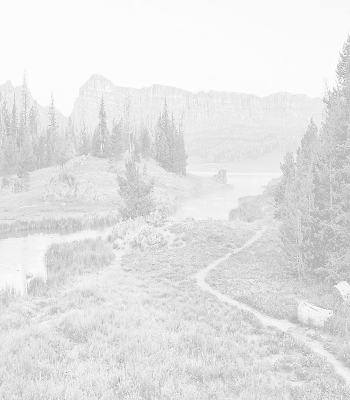

In [ ]:
# Let our original image be a gamma transformed image will low contrast
gamma = 0.2
low_contrast_image = np.floor(np.array(255*(gray_image / 255) ** gamma))
cv2_imshow(low_contrast_image)

In [ ]:
# We find the min and max of the range of values in the image
a = low_contrast_image.min()
b = low_contrast_image.max()

In [ ]:
a

148.0

In [ ]:
b

253.0

In [ ]:
# The formula for contrast stretching is -
# G(x,y) = ((d-c)/(b-a))*(f(x,y) - a) + c

In [ ]:
c = 0
d = 255

In [ ]:
g = ((d-c)/(b-a)) * (low_contrast_image - a) + c

Shape Before: (400, 350)
Shape After: (400, 350)
Before Contrast Stretching: 
Memory: 1120120


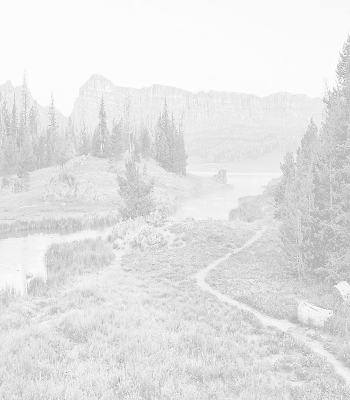

After Contrast Stretching: 
Memory: 1120120


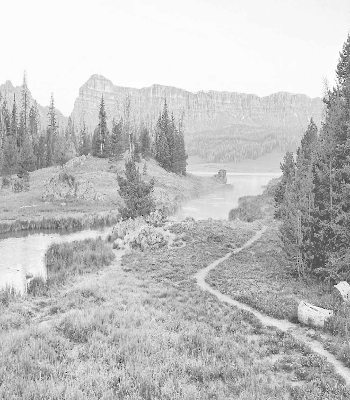

In [ ]:
print("Shape Before:", low_contrast_image.shape)
print("Shape After:", g.shape)
print("Before Contrast Stretching: ")
print("Memory:", sys.getsizeof(low_contrast_image))
cv2_imshow(low_contrast_image)
print("After Contrast Stretching: ")
print("Memory:", sys.getsizeof(g))
cv2_imshow(g)